# Setting up, prerequisites

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from matplotlib import colors
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import keras_tuner
import keras
import pandas as pd
from tensorflow.keras import layers
from keras import metrics
from sklearn import preprocessing
import math  
import datetime

global w 
global h 

In [ ]:
# CHECK TENSOR USING GPU
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

# Get data

/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_1.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/male_1.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/male_2.mat
(539820, 3)
[-0.029808, 0.125662, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

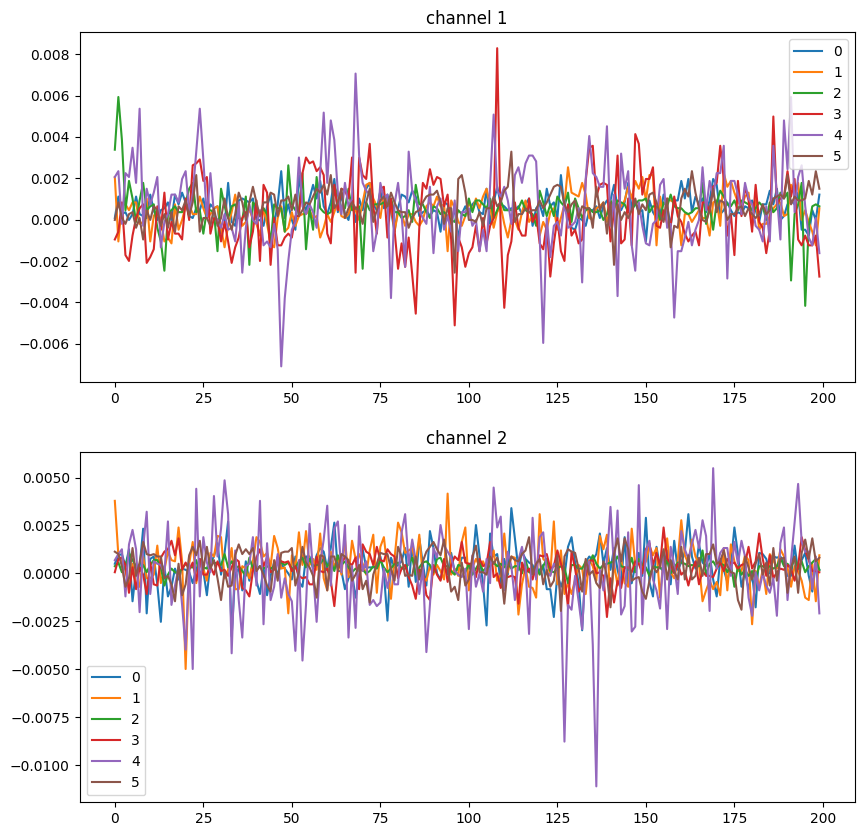

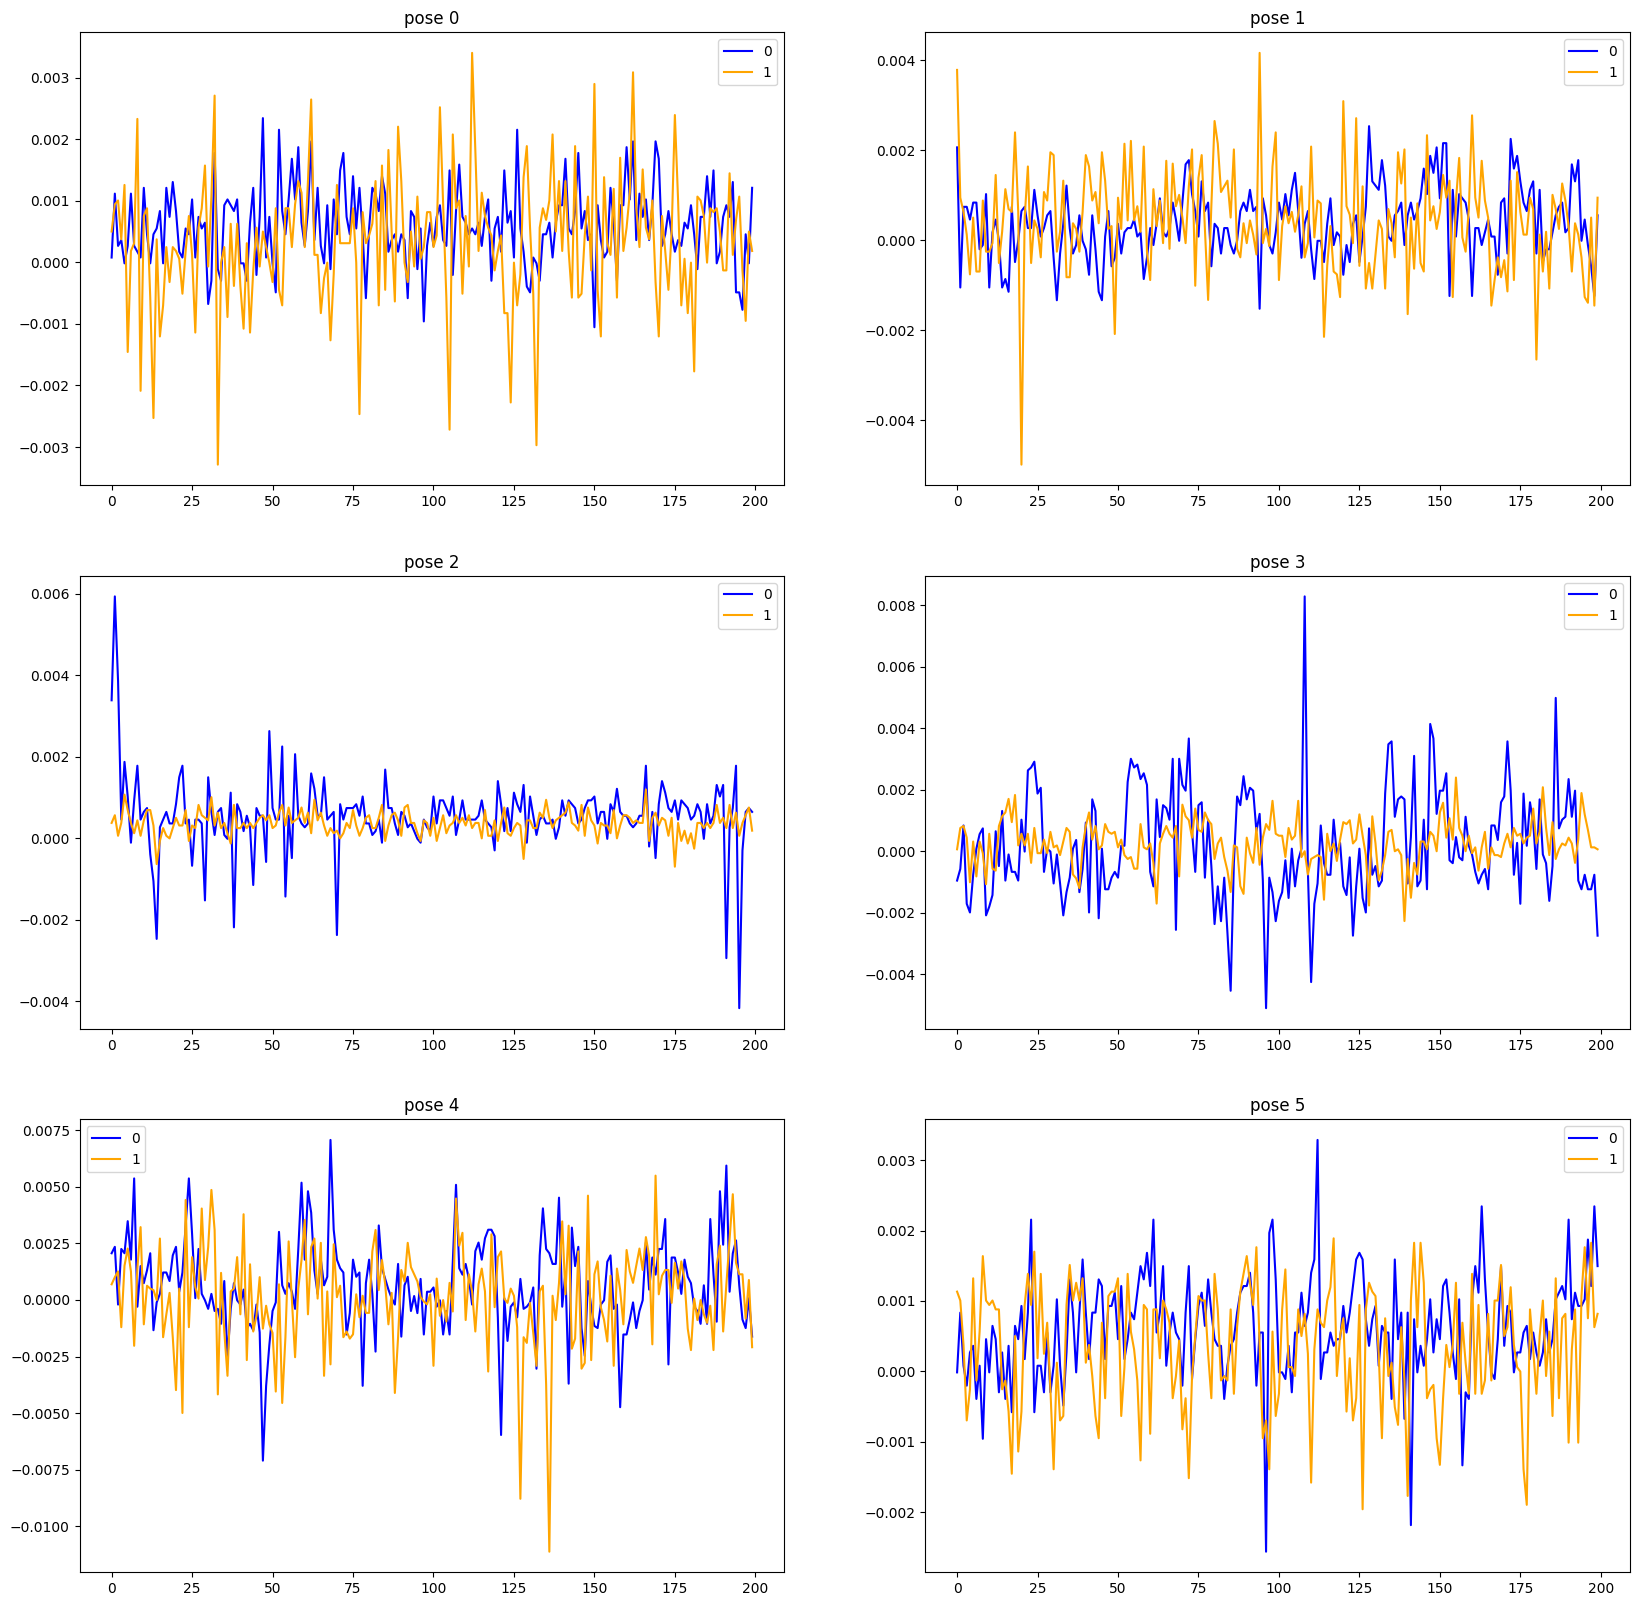

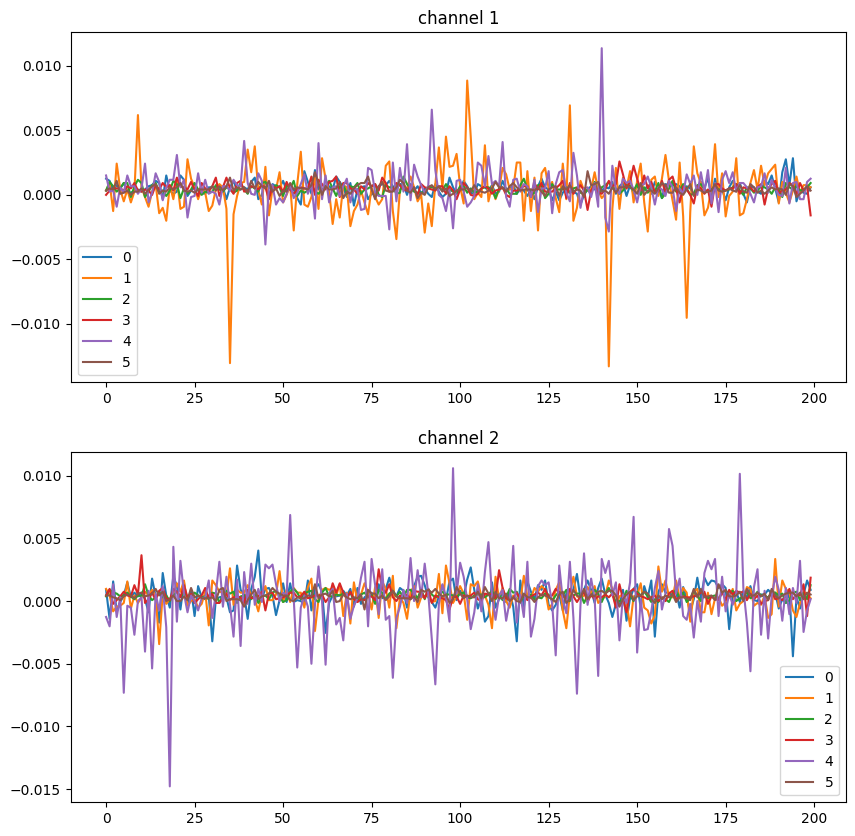

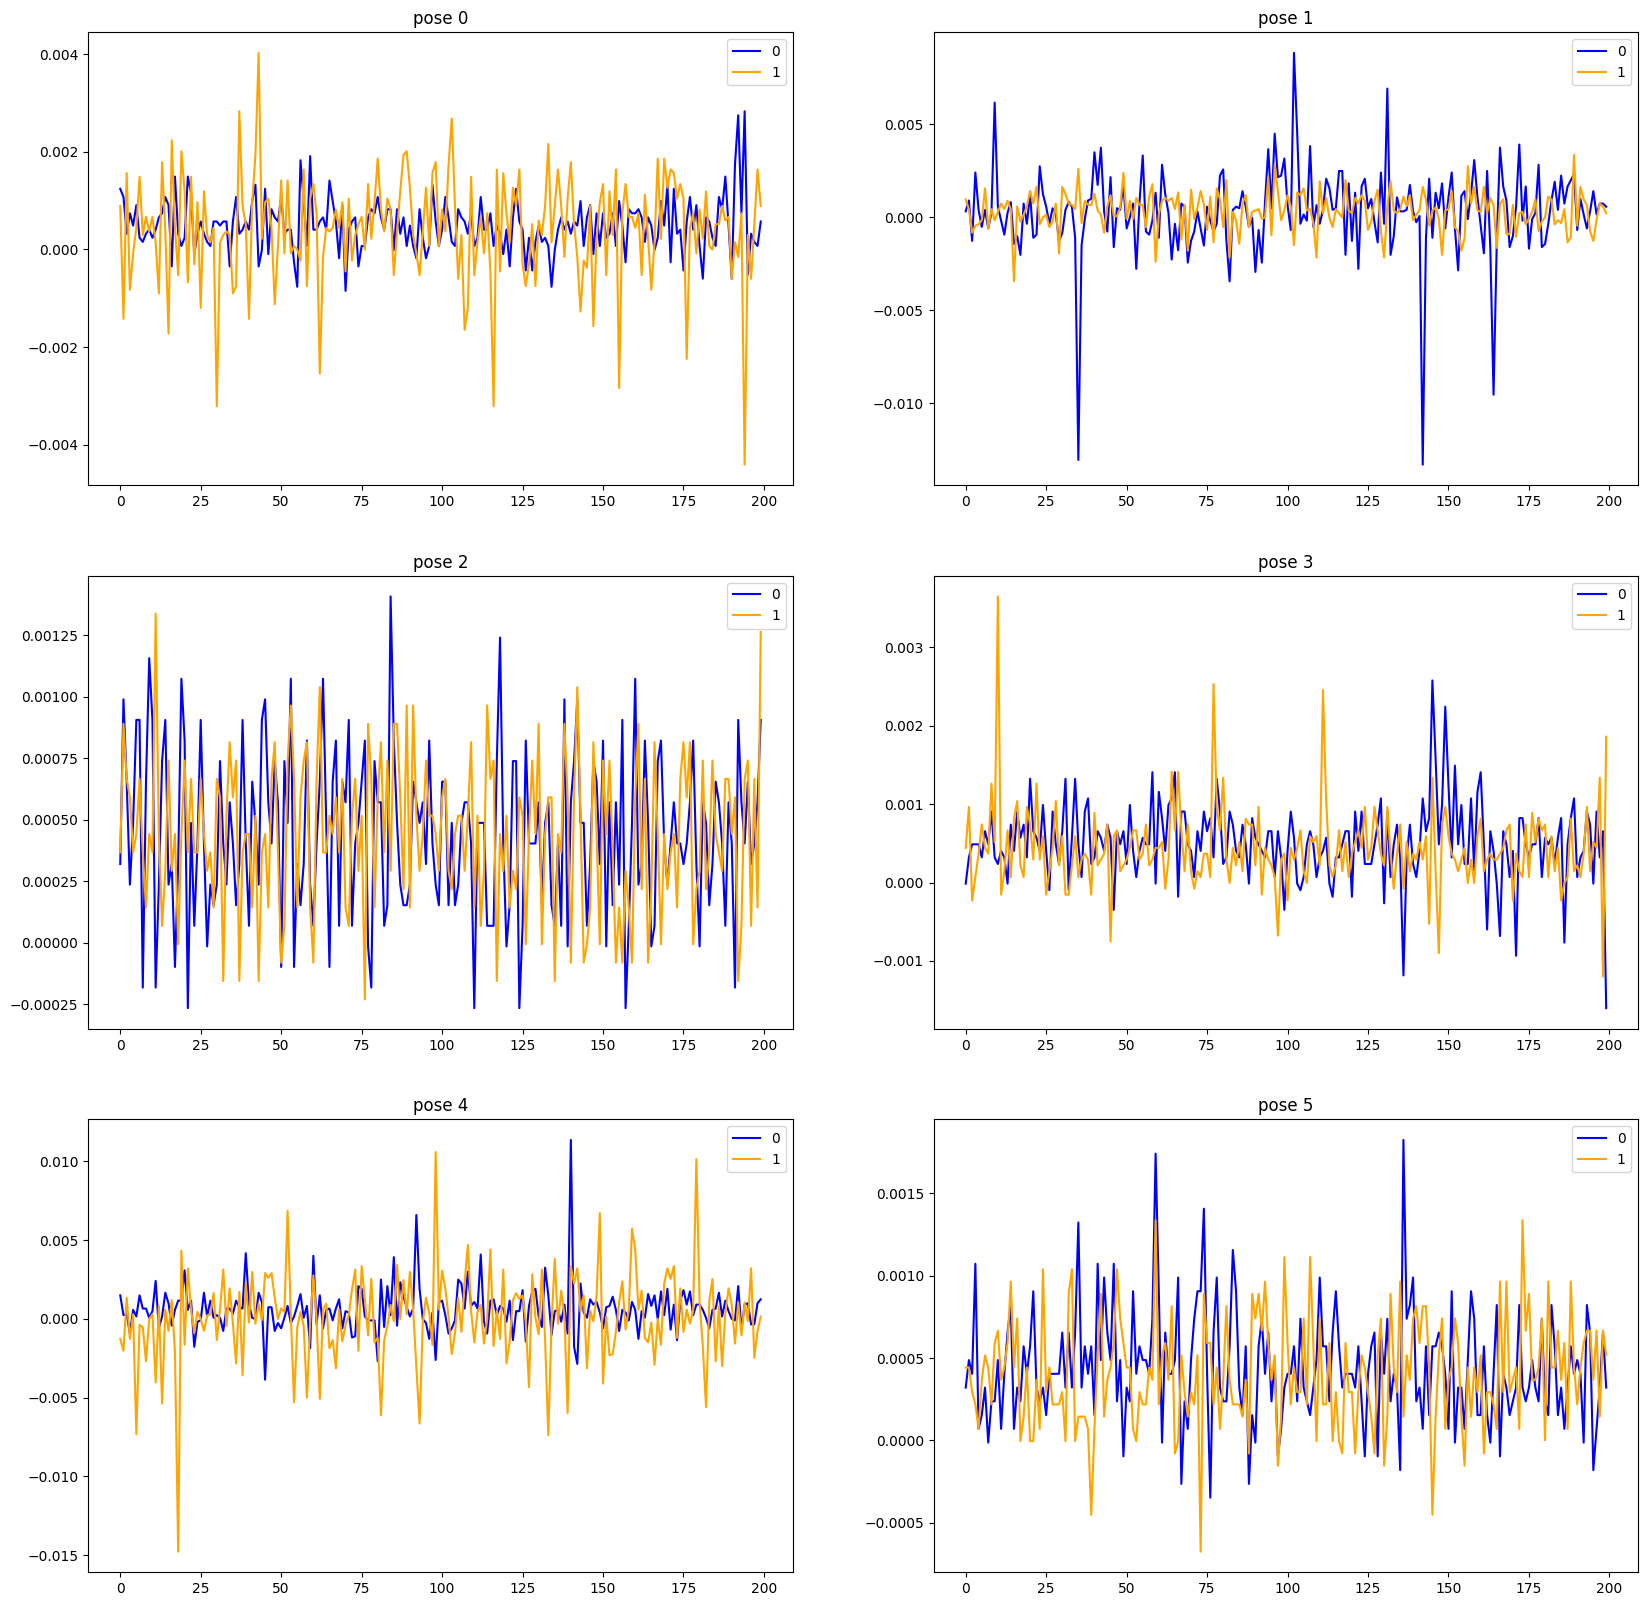

X shape: (337, 1600)


In [68]:
# SEPERATE SUBJECTS TO DIFFERENT DATASET

dataDir = "/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/"
dataFiles=['female_1.mat','female_2.mat','female_3.mat','male_1.mat','male_2.mat']
dataFiles_train = ['female_1.mat','male_1.mat','male_2.mat']
dataFiles_test = ['female_2.mat','female_3.mat']
# dataFiles=['female_1.mat']

e = 2.718281828459045

def normalize_arr(arr,i):
    signal = arr.copy()
    # signal = e**signal
    # signal /= np.sum(signal)
    # signal = np.clip(signal,1e-7,1e+7)
    signal = signal.tolist()
    signal.append(int(i/2))
    signal = np.array(signal)
    return signal

def get_channel_pair(chn1,chn2,i):
    paired_data = []
    # label = list((np.array(chn1).T)[-1].T.astype(int))
    label = int(i/2)
    chn1 =  list(np.delete(chn1,0,1))
    chn2 =  list(np.delete(chn2,0,1))
    # print(np.array(chn1).shape)
    # print(label)
    # print('label[i]: ',label[i])
    for chunk1 in chn1:
        chunk2 = chn2[i].T
        chunk1 = chunk1.T

        while(len(chunk1)>0):
            row=[chunk1[0],chunk2[0],label]
            paired_data.append(row)

            chunk1 = list(chunk1)
            chunk2 = list(chunk2)
            chunk1.pop(0)
            chunk2.pop(0)

    return paired_data


def getData(dataFiles):
    data = [] #processed and normalised with pose_idx
    for file in dataFiles:
        data_path = dataDir+file
        print(data_path)
        mat = scipy.io.loadmat(data_path)
        mat.pop("__header__")
        mat.pop("__version__")
        mat.pop("__globals__")
        i=0

        plot_interval = 100
        plot_index = 0

        for channel in mat: 
        
            if(i%2==0):
                channel2 =  channel[:-1]
                channel2 += '2'
                sigs1 = mat[channel] 
                sigs2 = mat[channel2]
                sigs1_norm = []
                sigs2_norm = []

                for signal in sigs1:
                    # signal = normalize_arr(signal,i)
                    if(signal[0]<2):
                        sigs1_norm.append(signal)
                for signal in sigs2:
                    # signal = normalize_arr(signal,i)
                    if(signal[0]<2):
                        sigs2_norm.append(signal)
                if i==0:
                    data = get_channel_pair(sigs1_norm,sigs2_norm,i)
                else:
                    None
                    data_lc = get_channel_pair(sigs1_norm,sigs2_norm,i)
                    data += data_lc
            i+=1
    return data
def get_nm_data(dataFiles):
    data = getData(dataFiles)
    print(np.array(data).shape)
    print(data[-3])




    data_nm = np.copy(data)[:,:2]
    data_nm.shape
    nm_c1 =  preprocessing.normalize([data_nm.T[0]]).T.flatten()
    nm_c2 =  preprocessing.normalize([data_nm.T[1]]).T.flatten()
    # nm_c2 = data_nm.T[1].T
    df_data_nm = pd.DataFrame(np.vstack((nm_c1,nm_c2)).T, columns = ['channel1','channel2'])

    label_arr=[]

    for row in data:
        label_arr.append(int(row[2]))
    print(label_arr)

    data_nm = df_data_nm.assign(label=label_arr)
    return data_nm
data_train_nm = get_nm_data(dataFiles_train)
data_test_nm = get_nm_data(dataFiles_test)

#==========================================

def GetSpacedElements(array, numElems = 4):
    out = array[np.round(np.linspace(0, len(array)-1, numElems)).astype(int)]
    return out

sample = 200
rate = sample * 6
print(rate)

test_d = np.copy(data_train_nm)
test_c = np.copy(data_test_nm)

if True:
    test_d=  GetSpacedElements(test_d,rate)
    test_c=  GetSpacedElements(test_c,rate)
test_d = test_d.T
test_c = test_c.T

b = np.array((np.hsplit(test_d, 6)))
a = np.array((np.hsplit(test_c, 6)))


print(test_d.shape)
print(b.shape)
#////////////////////============
def display_signals(b):
    w = 20
    h = 20
    fig = plt.figure(figsize=(10, 10))
    columns = 1
    rows = 2

    for index in range(1,2+1):
        idx = 0
        fig.add_subplot(rows, columns, index)
        for signal in b:
            plt.plot(signal[index-1],label=str(idx))
            idx += 1
        plt.title('channel '+str(index))
        plt.legend(ncol=1)
        
            
    plt.show()
    fig = plt.figure(figsize=(20, 20))
    columns = 2
    rows = 3
    idx = 0

    for signal in b:
        fig.add_subplot(rows, columns, idx+1)
        plt.plot(signal[0],color='blue',label=str(0))
        plt.plot(signal[1],color='orange',label=str(1))
        idx += 1
        plt.title('pose '+str(idx-1))
        plt.legend(ncol=1)
            
    plt.show()
display_signals(b)
display_signals(a)

def reshape_data(n,df_data):
    # get n channel 1 and n channel 2 into 1 sample
    chn1 = df_data['channel1'].to_numpy()
    chn2 = df_data['channel2'].to_numpy()
    label = df_data['label'].to_numpy()
    i = 0
    newShape_data = []
    while i < chn1.size:
        #currently  the size is 540000, tack batch 20 signals, the loop will rn 27000 times
        reshape_data = np.concatenate((chn1[i:i+n], chn2[i:i+n]))
        tmp = reshape_data.tolist()
        tmp.append(int(label[i]))
        tmp = np.array(tmp)

        if(len(reshape_data)==n*2):
            newShape_data.append(tmp)
        i += n

    newShape_data = np.array(newShape_data)
    return newShape_data

def split_X(arr):
    arr = arr.T
    arr = arr[0:-1]
    arr = arr.T
    return arr
def split_y(arr):
    arr = arr.T
    arr = arr[-1]
    arr = arr.T.astype(np.uint8)
    return arr
def reshape_arr(arr):
    new_shape = []
    for row in arr:
        n_len =int(math.sqrt(len(row)))
        row = row.reshape(n_len,n_len)
        new_shape.append(row)
    return np.array(new_shape)
def reshape_arr_img_transfer(arr,n):
    new_shape = []
    for row in arr:
        n_len = len(row)
        # row =np.pad(row,(0,n-n_len),'symmetric')
        row =np.pad(row,(0,n-n_len),'constant',constant_values=10)
        row = row.reshape(n,n)
        new_shape.append(row)
    return np.array(new_shape)
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts
# print(df)
def reshape_for_conv2d(t,w,h):
    train_size = int(len(t) * len(t[0])* len(t[0][0]) / (w*h))
    reshaped_tuple = t.reshape(train_size, w,h, 1)
    return reshaped_tuple




dataset_train = data_train_nm
dataset_test = data_test_nm

val_test_mask = np.random.rand(len(data_train_nm)) < 0.5

dataset_train = data_train_nm[val_test_mask]
dataset_val = data_train_nm[~val_test_mask]

img_w_h_len = 40
n = int(img_w_h_len * img_w_h_len / 2)

dataset_train_ar = reshape_data(n,dataset_train)
dataset_test_ar = reshape_data(n,dataset_test)
dataset_val_ar = reshape_data(n,dataset_val)

# print(dataset_train_ar[-20:][-1])

np.random.shuffle(dataset_train_ar)
np.random.shuffle(dataset_test_ar)
np.random.shuffle(dataset_val_ar)

# print(dataset_train_ar[-20:][-1])

X = split_X(dataset_train_ar)
y = split_y(dataset_train_ar)
print("X shape:",X.shape)

X_val = split_X(dataset_val_ar)
y_val = split_y(dataset_val_ar)

X_test = split_X(dataset_test_ar)
y_test = split_y(dataset_test_ar)


# OPTIONAL TURN X TO NxN
X = reshape_arr(X)
X_test = reshape_arr(X_test)
X_val = reshape_arr(X_val)



w = img_w_h_len
h = img_w_h_len
X = reshape_for_conv2d(X,w,h)
X_test = reshape_for_conv2d(X_test,w,h)
X_val = reshape_for_conv2d(X_val,w,h)
X_test = reshape_for_conv2d(X_test,w,h)




/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_2.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_3.mat
(536821, 3)
[0.199706, 0.15117, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

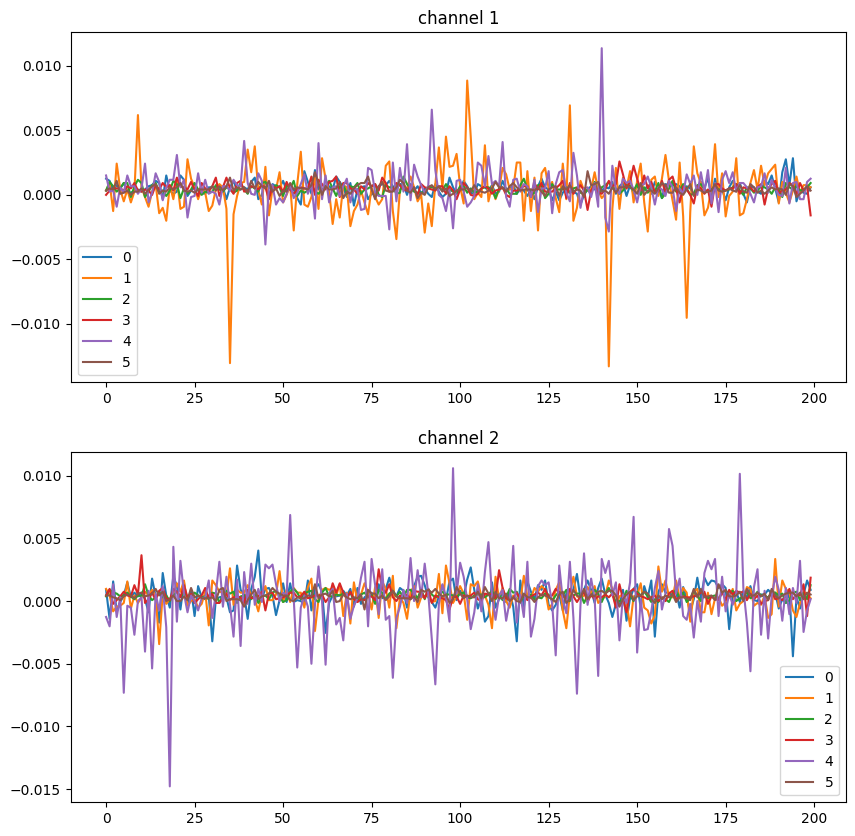

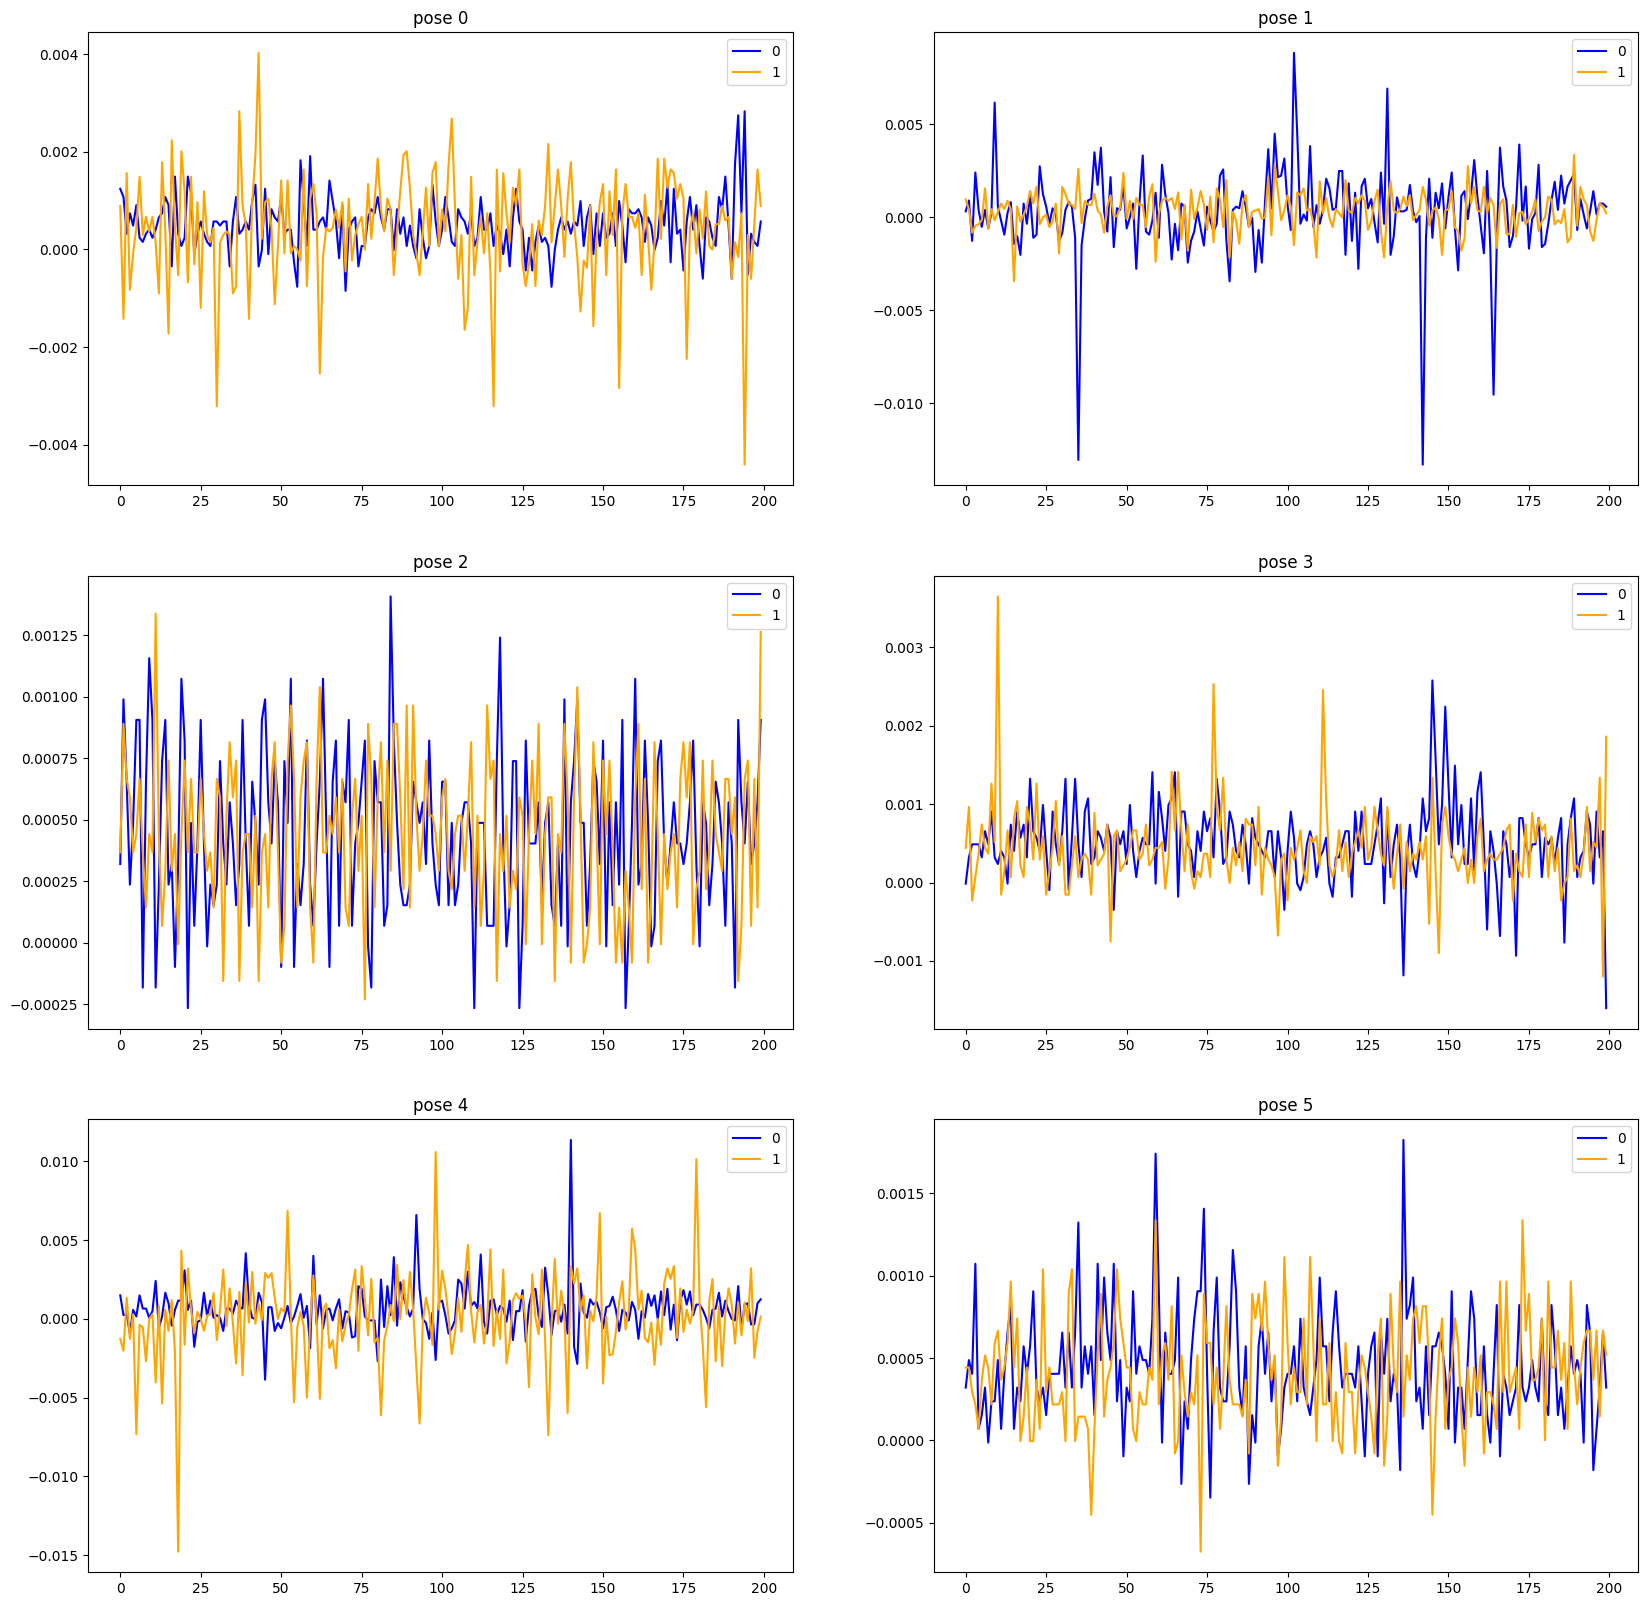

X shape: (268, 1600)


In [48]:
# ALT WAY TO GET TEST AND TRAIN DATA: MERGE & SHUFFLE


dataDir = "/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/"
dataFiles=['female_1.mat','female_2.mat','female_3.mat','male_1.mat','male_2.mat']
dataFiles=['female_1.mat','male_1.mat','male_2.mat']
dataFiles=['female_2.mat','female_3.mat']
# dataFiles=['female_1.mat']

data = [] #processed and normalised with pose_idx
e = 2.718281828459045

def normalize_arr(arr,i):
    signal = arr.copy()
    # signal = e**signal
    # signal /= np.sum(signal)
    # signal = np.clip(signal,1e-7,1e+7)
    signal = signal.tolist()
    signal.append(int(i/2))
    signal = np.array(signal)
    return signal

def get_channel_pair(chn1,chn2,i):
    paired_data = []
    # label = list((np.array(chn1).T)[-1].T.astype(int))
    label = int(i/2)
    chn1 =  list(np.delete(chn1,0,1))
    chn2 =  list(np.delete(chn2,0,1))
    # print(np.array(chn1).shape)
    # print(label)
    # print('label[i]: ',label[i])
    for chunk1 in chn1:
        chunk2 = chn2[i].T
        chunk1 = chunk1.T

        while(len(chunk1)>0):
            row=[chunk1[0],chunk2[0],label]
            paired_data.append(row)

            chunk1 = list(chunk1)
            chunk2 = list(chunk2)
            chunk1.pop(0)
            chunk2.pop(0)

    return paired_data



for file in dataFiles:
    data_path = dataDir+file
    print(data_path)
    mat = scipy.io.loadmat(data_path)
    mat.pop("__header__")
    mat.pop("__version__")
    mat.pop("__globals__")
    i=0

    plot_interval = 100
    plot_index = 0

    for channel in mat: 
       
        if(i%2==0):
            channel2 =  channel[:-1]
            channel2 += '2'
            sigs1 = mat[channel] 
            sigs2 = mat[channel2]
            sigs1_norm = []
            sigs2_norm = []

            for signal in sigs1:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs1_norm.append(signal)
            for signal in sigs2:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs2_norm.append(signal)
            if i==0:
                data = get_channel_pair(sigs1_norm,sigs2_norm,i)
            else:
                None
                data_lc = get_channel_pair(sigs1_norm,sigs2_norm,i)
                data += data_lc
        i+=1

print(np.array(data).shape)
print(data[-3])



from sklearn import preprocessing

data_nm = np.copy(data)[:,:2]
data_nm.shape
nm_c1 =  preprocessing.normalize([data_nm.T[0]]).T.flatten()
nm_c2 =  preprocessing.normalize([data_nm.T[1]]).T.flatten()
# nm_c2 = data_nm.T[1].T
df_data_nm = pd.DataFrame(np.vstack((nm_c1,nm_c2)).T, columns = ['channel1','channel2'])

label_arr=[]

for row in data:
    label_arr.append(int(row[2]))
print(label_arr)

data_nm = df_data_nm.assign(label=label_arr)
data_nm

#==========================================

def GetSpacedElements(array, numElems = 4):
    out = array[np.round(np.linspace(0, len(array)-1, numElems)).astype(int)]
    return out

sample = 200
rate = sample * 6
print(rate)

# test_d = np.copy(data)
test_d = np.copy(data_nm)

if True:
    test_d=  GetSpacedElements(test_d,rate)
test_d = test_d.T

# test_d = list(test_d)
b = np.array((np.hsplit(test_d, 6)))
# b = test_d


print(test_d.shape)
print(b.shape)
#////////////////////============

w = 20
h = 20
fig = plt.figure(figsize=(10, 10))
columns = 1
rows = 2

for index in range(1,2+1):
    idx = 0
    fig.add_subplot(rows, columns, index)
    for signal in b:
        plt.plot(signal[index-1],label=str(idx))
        idx += 1
    plt.title('channel '+str(index))
    plt.legend(ncol=1)
    
        
plt.show()
w = 20
h = 20
fig = plt.figure(figsize=(20, 20))
columns = 2
rows = 3
idx = 0

for signal in b:
    fig.add_subplot(rows, columns, idx+1)
    plt.plot(signal[0],color='blue',label=str(0))
    plt.plot(signal[1],color='orange',label=str(1))
    # plt.plot(signal[0],'r-d',label=str(0))
    # plt.plot(signal[1],'k-o',label=str(1))
    idx += 1
    plt.title('pose '+str(idx-1))
    plt.legend(ncol=1)
        
plt.show()
import pandas as pd
import math  
def reshape_data(n,df_data):
    # get n channel 1 and n channel 2 into 1 sample
    chn1 = df_data['channel1'].to_numpy()
    chn2 = df_data['channel2'].to_numpy()
    label = df_data['label'].to_numpy()
    i = 0
    newShape_data = []
    while i < chn1.size:
        #currently  the size is 540000, tack batch 20 signals, the loop will rn 27000 times
        reshape_data = np.concatenate((chn1[i:i+n], chn2[i:i+n]))
        tmp = reshape_data.tolist()
        tmp.append(int(label[i]))
        tmp = np.array(tmp)

        if(len(reshape_data)==n*2):
            newShape_data.append(tmp)
        i += n

    newShape_data = np.array(newShape_data)
    return newShape_data

def split_X(arr):
    arr = arr.T
    arr = arr[0:-1]
    arr = arr.T
    return arr
def split_y(arr):
    arr = arr.T
    arr = arr[-1]
    arr = arr.T.astype(np.uint8)
    return arr
def reshape_arr(arr):
    new_shape = []
    for row in arr:
        n_len =int(math.sqrt(len(row)))
        row = row.reshape(n_len,n_len)
        new_shape.append(row)
    return np.array(new_shape)
def reshape_arr_img_transfer(arr,n):
    new_shape = []
    for row in arr:
        n_len = len(row)
        # row =np.pad(row,(0,n-n_len),'symmetric')
        row =np.pad(row,(0,n-n_len),'constant',constant_values=10)
        row = row.reshape(n,n)
        new_shape.append(row)
    return np.array(new_shape)
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts
# print(df)
def reshape_for_conv2d(t,w,h):
    train_size = int(len(t) * len(t[0])* len(t[0][0]) / (w*h))
    reshaped_tuple = t.reshape(train_size, w,h, 1)
    return reshaped_tuple

df = data_nm
# df = pd.DataFrame(data.copy(),columns = ['channel1','channel2','label'])


mask = np.random.rand(len(df)) < 0.8
dataset_t_v = df[mask] #test & val
dataset_test = df[~mask]

val_test_mask = np.random.rand(len(dataset_t_v)) < 0.5
dataset_train = dataset_t_v[val_test_mask]
dataset_val = dataset_t_v[~val_test_mask]
img_w_h_len = 40
n = int(img_w_h_len * img_w_h_len / 2)

# n=392
# n=800
# n=961
# n=2888
dataset_train_ar = reshape_data(n,dataset_train)
dataset_test_ar = reshape_data(n,dataset_test)
dataset_val_ar = reshape_data(n,dataset_val)
# print(dataset_train_ar[-20:][-1])

np.random.shuffle(dataset_train_ar)
np.random.shuffle(dataset_test_ar)
np.random.shuffle(dataset_val_ar)

# print(dataset_train_ar[-20:][-1])

X = split_X(dataset_train_ar)
y = split_y(dataset_train_ar)
print("X shape:",X.shape)

X_val = split_X(dataset_train_ar)
y_val = split_y(dataset_train_ar)

X_test = split_X(dataset_test_ar)
y_test = split_y(dataset_test_ar)


# OPTIONAL TURN X TO NxN
X = reshape_arr(X)
X_val = reshape_arr(X_val)
X_test = reshape_arr(X_test)

# OPTIONAL TURN X TO NxN | N>= 150 transfer learning
tuple_size = 150
X_tl = reshape_arr_img_transfer(X,tuple_size)
# X_val_tl = reshape_arr_img_transfer(X_val,tuple_size)
# X_test_tl = reshape_arr_img_transfer(X_test,tuple_size)
w = img_w_h_len
h = img_w_h_len
X_test = reshape_for_conv2d(X_test,w,h)
X = reshape_for_conv2d(X,w,h)

# X_tl = signal_to_3channelimg(X_tl)
# X = signal_to_3channelimg(X)
# X_test = signal_to_3channelimg(X_test)


# Display the signal image

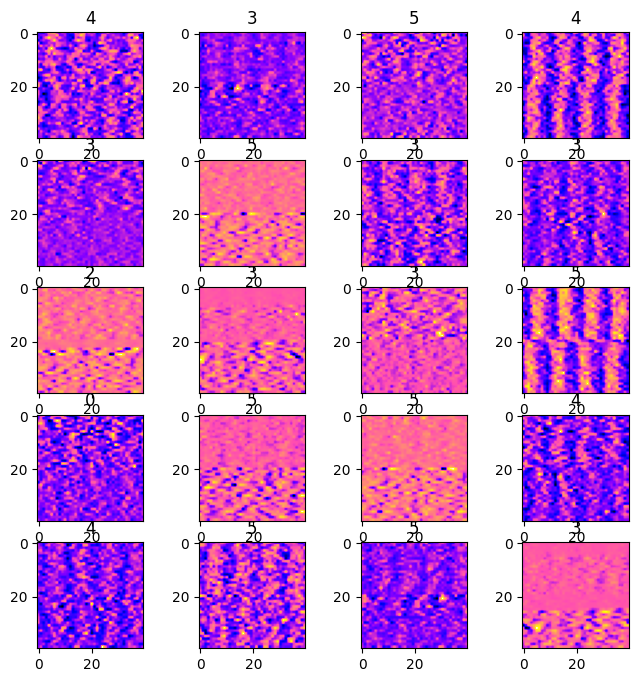

[4 3 5 4 3 5 3 3 2 3 3 5 0 5 5 4 4 5 5 3]


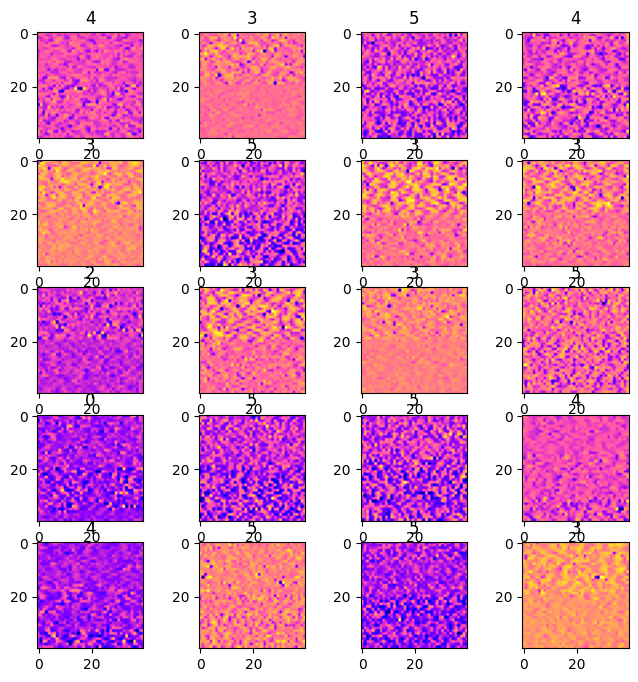

[5 5 1 2 1 0 5 3 0 4 1 2 1 0 0 3 3 5 5 3]


In [22]:
w = 20
h = 20
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(y[i-1])
    plt.imshow(X_test[i-1],cmap='gnuplot2')
    # plt.imshow(X[i-1]*255)
plt.show()
print(y[:(columns*rows)])

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(y[i-1])
    # plt.imshow(X[i-1]*255,cmap='gnuplot2')
    plt.imshow(X[i-1],cmap='gnuplot2')
    # plt.imshow(X[i-1]*255)

plt.show()
print(y_test[:(columns*rows)])



w = img_w_h_len
h = img_w_h_len

# NN
## training & evaluate

In [35]:
# inputs = keras.Input(shape=(392*2,1))
# input_dim = int(math.sqrt(n*2))
inputs = keras.Input(shape=(img_w_h_len, img_w_h_len, 1))
# inputs = keras.Input(shape=(input_dim,input_dim))

x = layers.Rescaling(2)(inputs)
x = layers.Flatten()(x)
# Apply some convolution and pooling layers
# x = layers.Flatten()(inputs)

x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
num_classes = 6
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(optimizer=keras.optimizers.Nadam(
    learning_rate=1e-3
     ), loss="sparse_categorical_crossentropy")


Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_18 (Rescaling)    (None, 40, 40, 1)         0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_67 (Dense)            (None, 128)               204928    
                                                                 
 dense_68 (Dense)            (None, 128)               16512     
                                                                 
 dense_69 (Dense)            (None, 6)                 774       
                                                                 
Total params: 222214 (868.02 KB)
Trainable params: 222214 

In [53]:
# MODEL - CONV2D + DENSE
input_shape = [w, h, 1]

inputs = keras.Input(shape=input_shape)
x = layers.Rescaling(scale=2)(inputs)

x = layers.Conv2D(64, (3,3), activation='relu',use_bias=True, input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(7, 7), strides=(1, 1), padding='valid')(x)

x = keras.layers.Dropout(0.5)(x,training=True)   # Regularize with dropout

x = layers.Conv2D(32, (5,5), activation='relu',use_bias=True, input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(5,5), strides=(3, 2), padding='valid')(x)

x = layers.Softmax()(x)

x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(18, activation="relu")(x)

x = keras.layers.GlobalAveragePooling2D()(x)

num_classes = 6

outputs = keras.layers.Dense(num_classes,activation="softmax")(x) 

model = keras.Model(inputs, outputs)
# model = new_model
# model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.1), 
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=1e-3), 
        loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])
model.summary()



Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_22 (Rescaling)    (None, 40, 40, 1)         0         
                                                                 
 conv2d_38 (Conv2D)          (None, 38, 38, 64)        640       
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 32)        51232     
                                                          

In [ ]:
%tensorboard --logdir logs/fit

Epoch 1/200


2023-11-10 16:08:30.512953: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_21/dropout_19/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


3/3 [==============================] - 3s 182ms/step - loss: 1.7919 - accuracy: 0.1679 - lr: 0.0010
Epoch 2/200
3/3 [==============================] - 1s 180ms/step - loss: 1.7920 - accuracy: 0.1381 - lr: 0.0010
Epoch 3/200
3/3 [==============================] - 1s 180ms/step - loss: 1.7918 - accuracy: 0.1455 - lr: 0.0010
Epoch 4/200
3/3 [==============================] - 1s 178ms/step - loss: 1.7917 - accuracy: 0.1716 - lr: 0.0010
Epoch 5/200
3/3 [==============================] - 1s 180ms/step - loss: 1.7916 - accuracy: 0.1940 - lr: 0.0010
Epoch 6/200
3/3 [==============================] - 1s 180ms/step - loss: 1.7917 - accuracy: 0.1716 - lr: 0.0010
Epoch 7/200
3/3 [==============================] - 1s 175ms/step - loss: 1.7913 - accuracy: 0.1716 - lr: 0.0010
Epoch 8/200
3/3 [==============================] - 1s 175ms/step - loss: 1.7913 - accuracy: 0.1754 - lr: 0.0010
Epoch 9/200
3/3 [==============================] - 1s 189ms/step - loss: 1.7911 - accuracy: 0.2239 - lr: 0.0010
Epoc

/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 1s 214ms/step - loss: 1.2799 - accuracy: 0.4627 - lr: 0.0010
Epoch 68/200
3/3 [==============================] - 1s 203ms/step - loss: 1.2678 - accuracy: 0.4291 - lr: 0.0010
Epoch 69/200
3/3 [==============================] - 1s 199ms/step - loss: 1.2552 - accuracy: 0.4590 - lr: 0.0010
Epoch 70/200
3/3 [==============================] - 1s 200ms/step - loss: 1.2394 - accuracy: 0.4664 - lr: 0.0010
Epoch 71/200
3/3 [==============================] - 1s 191ms/step - loss: 1.2276 - accuracy: 0.4627 - lr: 0.0010
Epoch 72/200
3/3 [==============================] - 1s 201ms/step - loss: 1.2175 - accuracy: 0.4776 - lr: 0.0010
Epoch 73/200
3/3 [==============================] - 1s 200ms/step - loss: 1.2032 - accuracy: 0.4925 - lr: 0.0010
Epoch 74/200
3/3 [==============================] - 1s 206ms/step - loss: 1.1932 - accuracy: 0.4888 - lr: 0.0010
Epoch 75/200
3/3 [==============================] - 1s 199ms/step - loss: 1.1797 - accuracy: 0.4963 - lr: 0.0

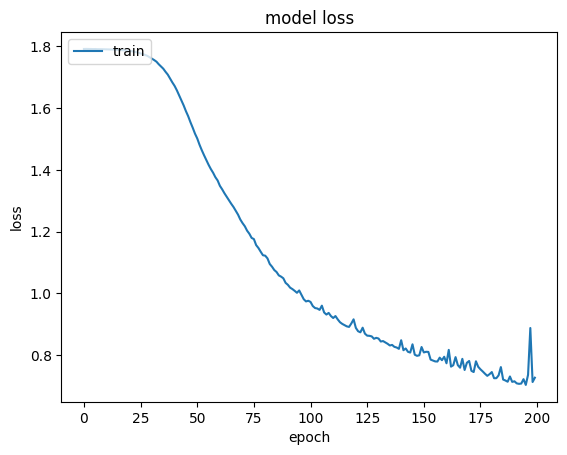

5/5 [==============================] - 0s 24ms/step - loss: 0.7266 - accuracy: 0.7820


2023-11-10 16:10:27.744245: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_21/dropout_19/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


In [54]:
# T R A I N

batch_size = 100
epochs = 200

# epochs = 65000

log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
    tf.keras.callbacks.EarlyStopping(patience=100,monitor='loss'),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./models/checkpoints/model.{epoch:02d}-{loss:.2f}.h5',
        monitor='loss',
        mode='max',
        save_freq=200,
        save_best_only=True
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10)
]
history = model.fit(X, y,batch_size=batch_size, epochs=epochs,callbacks=my_callbacks)

print(history.params)
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

evaluate = model.evaluate(X_test,y_test)


[4 4 1 5 4 1 0 3 0 2 2 4 3 2 4 1 0 1 3 3 2 1 0 4 3 3 3 3 3 4 5 3 1 5 1 5 5
 3 2 3 3 5 4 0 2 4 4 4 1 3 4 0 3 5 0 4 1 3 5 5 2 3 0 1 3 2 1 4 5 2 5 3 3 0
 5 1 4 2 4 1 3 5 3 2 1 0 4 3 5 1 0 1 3 2 2 0 1 1 3 0 5 1 5 1 1 2 4 2 4 0 3
 0 5 0 0 1 0 4 3 5 5 1 2 4 1 5 0 4 5 5 4 3 0 2 3 2 2 0 1 4 2 0 0 3 0 3 5 0
 2 1 2 0 2 0 3 1 2 4 0 3 5 4 5 0 1 2 4 2 5 2 0 3 4 4 0 0 4 4 5 3 5 0 1 4 2
 5 5 2 5 1 0 5 0 4 3 4 3 3 3 2 3 4 1 2 3 2 4 5 3 5 2 1 4 2 0 2 1 2 2 4 3 1
 0 5 3 1 2 3 0 2 5 5 2 1 2 1 0 3 0 3 0 2 0 5 2 3 0 5 4 5 5 3 4 0 3 2 3 3 1
 2 4 4 2 0 4 4 1 5 5 1 2 4 1 0 5 3 3 2 1 4 1 2 1 5 2 4 0 5 5 2 0 2 3 0 2 4
 0 4 4 4 0 3 4 1 4 5 1 2 0 5 2 3 1 5 2 2 2 5 2 3 2 2 5 3 4 2 2 3 0 5 5 0 1
 1 5 2]
 1/11 [=>............................] - ETA: 0s

11/11 [==============================] - 0s 7ms/step
X,y shape:  (336, 40, 40, 1) / (336,) 
X,y test shape:  (671, 40, 40, 1) / (671,)
[4 1 4 3 4 1 0 3 0 2 2 4 3 2 4 1 0 1 3 3 2 1 0 4 3 3 2 3 3 4 2 3 1 2 4 5 2
 3 2 3 3 2 4 3 2 4 4 4 1 5 4 0 5 3 0 4 4 3 3 2 2 0 0 4 3 2 4 4 5 2 3 3 3 0
 3 1 4 2 4 4 5 2 3 2 1 0 4 3 2 4 0 4 5 2 2 0 1 1 3 0 2 4 3 3 1 2 1 2 1 0 3
 0 2 0 0 1 0 4 3 3 5 1 2 4 1 5 0 4 2 5 4 2 0 2 3 2 5 0 1 0 2 0 3 5 3 5 3 0
 2 1 2 0 2 0 3 1 2 4 0 5 3 4 2 3 0 2 4 2 5 2 0 3 4 4 0 1 4 4 2 0 2 0 0 4 2
 5 3 2 2 4 0 5 0 4 3 4 3 3 3 2 3 4 4 2 3 2 4 3 3 3 2 1 1 2 0 2 4 2 2 4 3 1
 0 3 3 0 2 3 0 2 2 2 2 4 2 4 0 3 3 3 0 2 0 3 2 3 0 2 0 2 2 2 1 0 3 2 3 4 1
 2 1 4 2 3 4 4 4 2 2 4 2 4 1 0 2 3 3 2 4 0 4 2 1 2 2 4 0 2 3 2 0 2 5 0 2 4
 0 4 1 4 0 3 4 1 4 2 1 2 0 5 2 5 4 2 2 2 2 2 2 3 2 2 2 5 4 2 2 3 0 2 5 0 4
 4 2 2] 


11/11 [==============================] - 0s 8ms/step - loss: 0.7771 - accuracy: 0.6815


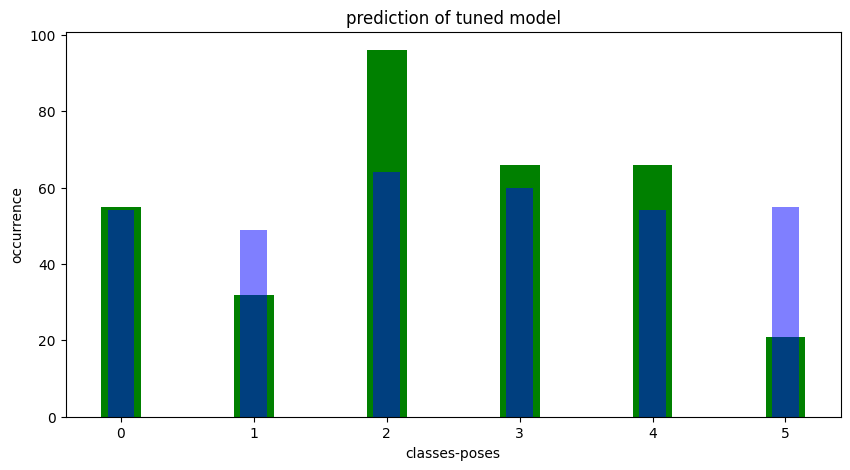

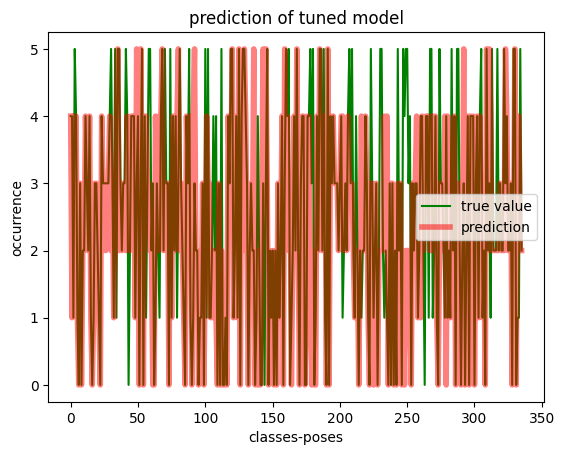

In [67]:
# DISPLAY PREDICTION
test_sample = len(y)


print(y_test[:test_sample])
pred_label = []

preds = model.predict(X_test[:test_sample])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print('X,y shape: ',X.shape,'/',y.shape,"\nX,y test shape: ",X_test.shape,"/", y_test.shape)
print(pred_label[:test_sample],"\n\n")

evaluate = model.evaluate(X_test[:test_sample],y_test[:test_sample])


unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test[:test_sample], return_counts=True)


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(np.arange(6), counts, color ='green', 
        width = 0.3)
plt.bar(np.arange(6), ycounts, color ='blue', 
        width = 0.2,alpha=0.5)
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.show()
plt.plot(y_test[:test_sample],color ='green', label="true value")
plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.legend(ncol=1)

plt.show()

## Save a model

In [56]:
# model.save("./models/tuned_model_loss_0.7_0.7_acc_new_10_11.keras")

### load a model

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_59 (InputLayer)       [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_60 (Rescaling)    (None, 40, 40, 1)         0         
                                                                 
 conv2d_112 (Conv2D)         (None, 38, 38, 64)        640       
                                                                 
 max_pooling2d_138 (MaxPool  (None, 34, 34, 64)        0         
 ing2D)                                                          
                                                                 
 dropout_51 (Dropout)        (None, 34, 34, 64)        0         
                                                                 
 conv2d_113 (Conv2D)         (None, 30, 34, 32)        10272     
                                                          

2023-11-09 18:12:45.352126: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_54/dropout_51/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


5/5 [==============================] - 2s 21ms/step
[1.83351731300354, 0.5373134613037109]


 [5 5 2 0 1 1 5 2 3 4 0 3 1 0 5 5 4 2 4 5 3 3 4 3 3 4 3 2 4 3]
 [2 5 2 1 0 0 2 2 5 3 1 5 1 0 2 2 4 2 3 2 5 5 4 5 5 3 5 2 3 5]


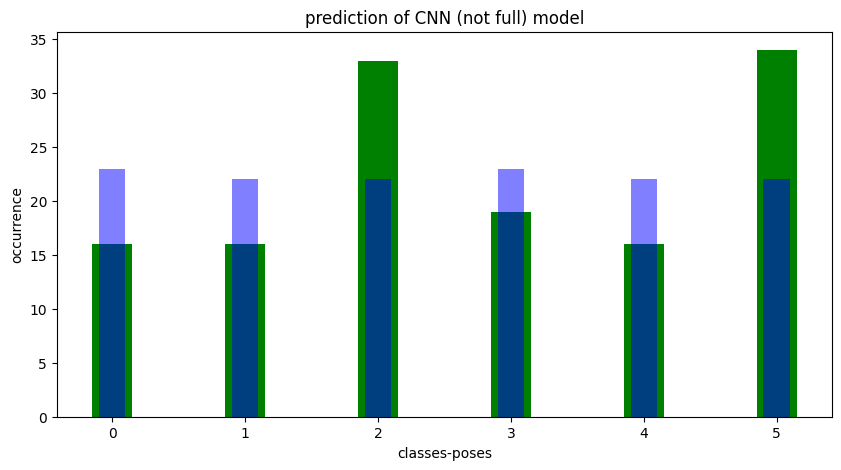

5/5 [==============================] - 1s 8ms/step - loss: 2.6359 - accuracy: 0.4701


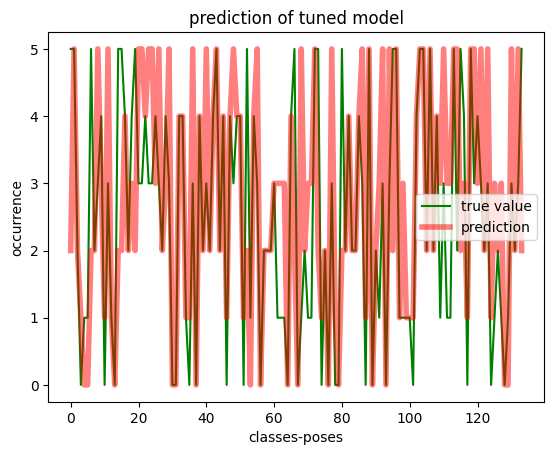

5/5 [==============================] - 0s 9ms/step - loss: 2.6215 - accuracy: 0.4776


In [772]:
# new_model = tf.keras.models.load_model('./models/model_0.5_40l_1c_new.keras')
# new_model = tf.keras.models.load_model('./models/model_0.4_40l_1c_new.keras')
new_model = tf.keras.models.load_model('./models/tuned_model_loss_2_0.4_acc_new_9_11.keras')

# Show the model architecture
new_model.summary()
pred_label = []

# preds = new_model.predict(X)
# evaluate = new_model.evaluate(X,y)
# print("\n\n===================================================\n",y[:30])


preds = new_model.predict(X_test)
print(evaluate)

print("\n\n===================================================\n",y_test[:30])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print("",pred_label[:30])

# GRAPH OF OUTPUT OCCURANCE:
unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test, return_counts=True)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(np.arange(6), counts, color ='green', 
        width = 0.3)
plt.bar(np.arange(6), ycounts, color ='blue', 
        width = 0.2,alpha=0.5)
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of CNN (not full) model")
plt.show()
evaluate = new_model.evaluate(X_test,y_test)

plt.plot(y_test,color ='green', label="true value")
plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.legend(ncol=1)

plt.show()
evaluate = new_model.evaluate(X_test,y_test)
model = new_model

# some activation function

In [ ]:
# # some activation functions
# SIGMOID

lim = 50

fig = plt.figure(figsize=(8, 4))
columns = 2
rows = 1

for i in range(1, columns*rows +1):
    x = np.linspace(-lim, lim, 100)
    fig.add_subplot(rows, columns, i)
    if (i==1):
        img = np.random.randint(10, size=(h,w))
        plt.title("S I G M O I D")
        # plt.imshow(X_tl[i-1]*255,cmap='gnuplot2')
        y =1/ (1+math.e **-x)

    else:
        plt.title("R E L U")
        y = []
        for i in x:
            y.append(max(0,i))

    plt.plot(x, y)
    
    
plt.show()
print(y[:(columns*rows)])


# tuning with tuner

In [77]:
def build_model(hp):
    inputs = keras.Input(shape=(w, h, 1))
    x = layers.Rescaling(scale=2)(inputs)

    # Number of layers of the CNN is also a hyperparameter.
    for i in range(hp.Int(f"Conv_1",min_value=1,max_value= 5)):
        x = layers.Conv2D(
            hp.Int(f"filters_{i}", 32, 64, step=5),
            kernel_size=(3, 3),
            activation="relu",
        )(x)
        x = keras.layers.Dropout(0.2)(x,training=True)  

        x = layers.MaxPooling2D(pool_size=(5, 5))(x)
    x = layers.Softmax()(x)
    
    for i in range(hp.Int(f"Denses_1",min_value=1,max_value= 3)):
        # Number of units of each layer are
        # different hyperparameters with different names.
        x = layers.Dense(
            units=hp.Int(f"units_{i}", 16, 32, step=5), activation="relu",
        )(x)
    x = keras.layers.Dropout(0.2)(x,training=True)  
    for i in range(hp.Int(f"Conv_2",min_value=1,max_value= 5)):
        x = layers.Conv2D(
            hp.Int(f"filters_{i}", 32, 64, step=5),
            kernel_size=(3, 3),
            activation="relu",
        )(x)
    x = keras.layers.Dropout(0.2)(x,training=True)  

    x = layers.MaxPooling2D(pool_size=(5, 5))(x)
    if hp.Boolean("dropout"):
        x = layers.Dropout(0.2)(x)
    for i in range(hp.Int(f"Denses_2",min_value=1,max_value= 3)):
        x = layers.Dense(
            units=hp.Int(f"units_{i}", 32, 128, step=32), activation="relu",
        )(x)
    # A hyperparamter for whether to use dropout layer.
    if hp.Boolean("dropout"):
        x = layers.Dropout(0.5)(x)
    x = layers.Softmax()(x)

    x = keras.layers.GlobalAveragePooling2D()(x)
    
    # The last layer contains 10 units,
    # which is the same as the number of classes.
    num_classes = 6
    learning_rate = hp.Float(f"lr", min_value=1e-4, max_value=1e-2, sampling="log")
    outputs = layers.Dense(units=num_classes, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=keras.optimizers.Nadam(learning_rate=learning_rate), 
            loss="sparse_categorical_crossentropy",
        metrics=['accuracy'])

    return model


hp = keras_tuner.HyperParameters()
hp.values["dropout"] = True
model_tun = build_model(hp)
model_tun(X[:100])
model_tun.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_27 (Rescaling)    (None, 40, 40, 1)         0         
                                                                 
 conv2d_48 (Conv2D)          (None, 38, 38, 32)        320       
                                                                 
 dropout_38 (Dropout)        (None, 38, 38, 32)        0         
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 softmax_28 (Softmax)        (None, 7, 7, 32)          0         
                                                          

In [78]:
tuner = keras_tuner.tuners.Hyperband(
    build_model,
    objective=['loss','accuracy'],
    max_epochs=2,
    executions_per_trial=2,
    directory='./models/checkpoints/',
    project_name='cyber_arm_tuner',
    )
print("================================================")

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
tuner.search(X, y, epochs=300, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=3)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first conv
layer is {best_hps.get('Conv_1')} and the optimal learning rate for the optimizer
is {best_hps.get('lr')}.
""")

# best_model.fit(x=X, y=y, epochs=1)


Trial 2 Complete [00h 00m 01s]

Best multi_objective So Far: 1.6253391802310944
Total elapsed time: 00h 00m 11s

The hyperparameter search is complete. The optimal number of units in the first conv
layer is 1 and the optimal learning rate for the optimizer
is 0.0001473332769477322.



In [ ]:
tuner.search_space_summary()

In [79]:
# my_callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=6000,monitor='loss'),
#     tf.keras.callbacks.ModelCheckpoint(
#         filepath='./models/checkpoints/model.{epoch:02d}-{loss:.2f}.h5',
#         monitor='loss',
#         mode='max',
#         save_freq=50,
#         save_best_only=True
#         ),
#     tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#     # keras.callbacks.LearningRateScheduler(scheduler),
# ]
log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
    tf.keras.callbacks.EarlyStopping(patience=100,monitor='loss'),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./models/checkpoints/model_tuned.{epoch:02d}-{loss:.2f}.h5',
        monitor='loss',
        mode='max',
        save_freq=50,
        save_best_only=True
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10)
]
model = tuner.hypermodel.build(best_hps)
model.summary()
history = model.fit(X, y, epochs=30000, validation_split=0.2,callbacks=my_callbacks)

val_acc_per_epoch = history.history['accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 40, 40, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 62)        620       
                                                                 
 dropout_2 (Dropout)         (None, 38, 38, 62)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 62)          0         
 g2D)                                                            
                                                                 
 softmax (Softmax)           (None, 7, 7, 62)          0         
                                                             

2023-11-10 16:28:19.624373: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 [==============================] - 4s 85ms/step - loss: 1.7954 - accuracy: 0.1636 - val_loss: 1.7874 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 2/30000
9/9 [==============================] - 0s 35ms/step - loss: 1.7954 - accuracy: 0.1636 - val_loss: 1.7874 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 3/30000
9/9 [==============================] - 0s 32ms/step - loss: 1.7953 - accuracy: 0.1636 - val_loss: 1.7875 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 4/30000
9/9 [==============================] - 0s 33ms/step - loss: 1.7953 - accuracy: 0.1636 - val_loss: 1.7875 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 5/30000
9/9 [==============================] - 0s 33ms/step - loss: 1.7952 - accuracy: 0.1636 - val_loss: 1.7876 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 6/30000
5/9 [===============>..............] - ETA: 0s - loss: 1.8031 - accuracy: 0.1437

/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 39ms/step - loss: 1.7952 - accuracy: 0.1636 - val_loss: 1.7876 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 7/30000
9/9 [==============================] - 0s 33ms/step - loss: 1.7950 - accuracy: 0.1636 - val_loss: 1.7877 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 8/30000
9/9 [==============================] - 0s 34ms/step - loss: 1.7950 - accuracy: 0.1636 - val_loss: 1.7878 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 9/30000
9/9 [==============================] - 0s 34ms/step - loss: 1.7949 - accuracy: 0.1636 - val_loss: 1.7878 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 10/30000
9/9 [==============================] - 0s 33ms/step - loss: 1.7948 - accuracy: 0.1636 - val_loss: 1.7879 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 11/30000
9/9 [==============================] - 0s 32ms/step - loss: 1.7947 - accuracy: 0.1636 - val_loss: 1.7880 - val_accuracy: 0.1765 - lr: 1.4733e-04
Epoch 12/30000
9/9 [==============================] - 0s 3

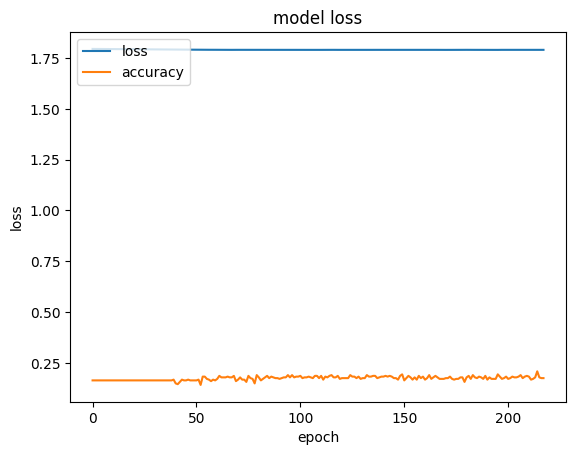

In [80]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [ ]:
preds = model.predict(X_test)
# preds = new_model.predict(X_test)
print(evaluate)
pred_label=[]
print("\n\n===================================================\n",y_test[:30])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print("",pred_label[:30])

# GRAPH OF OUTPUT OCCURANCE:
unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test, return_counts=True)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
# plt.bar(np.arange(6), counts, color ='green', 
#         width = 0.3)
# plt.bar(np.arange(6), ycounts, color ='blue', 
#         width = 0.2,alpha=0.5)
plt.plot(y_test,color ='green', label="true value")
plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.legend(ncol=1)

plt.show()
evaluate = new_model.evaluate(X_test,y_test)

In [ ]:
# model.save("./models/tuned_model_loss_0.3_0.9_acc.keras")

In [ ]:
evaluate = model.evaluate(X_test,y_test)

In [ ]:
new_model = tf.keras.models.load_model('./models/tuned_model_loss_0.2_0.9_acc.keras')
# new_model = tf.keras.models.load_model('./models/model_0.4_40l_1c_new.keras')

# Show the model architecture
new_model.summary()
pred_label = []

# preds = new_model.predict(X)
# evaluate = new_model.evaluate(X,y)
# print("\n\n===================================================\n",y[:30])


preds = new_model.predict(X_test)
print(evaluate)

print("\n\n===================================================\n",y_test[:30])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print("",pred_label[:30])

# GRAPH OF OUTPUT OCCURANCE:
unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test, return_counts=True)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(np.arange(6), counts, color ='green', 
        width = 0.3)
plt.bar(np.arange(6), ycounts, color ='blue', 
        width = 0.2,alpha=0.5)
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.show()
evaluate = new_model.evaluate(X_test,y_test)


In [ ]:
new_model = tf.keras.models.load_model('./models/tuned_model_loss_0.2_0.9_acc.keras')
# new_model = tf.keras.models.load_model('./models/model_0.4_40l_1c_new.keras')

# Show the model architecture
new_model.summary()
pred_label = []

# preds = new_model.predict(X)
# evaluate = new_model.evaluate(X,y)
# print("\n\n===================================================\n",y[:30])


preds = new_model.predict(X_test)
print(evaluate)

print("\n\n===================================================\n",y_test[:30])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print("",pred_label[:30])

# GRAPH OF OUTPUT OCCURANCE:
unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test, return_counts=True)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
# plt.bar(np.arange(6), counts, color ='green', 
#         width = 0.3)
# plt.bar(np.arange(6), ycounts, color ='blue', 
#         width = 0.2,alpha=0.5)
plt.plot(y_test,color ='green', label="true value")
plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.legend(ncol=1)

plt.show()
evaluate = new_model.evaluate(X_test,y_test)





# ALGO
## Random Forest

In [ ]:
import math
import urllib
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_decision_forests as tfdf


In [ ]:
dataset_train

In [ ]:
print(dataset_test_ar[0][-1])
column_name =np.array(list(range(n*2+1)))
column_name=column_name+1
column_name=column_name.astype('str')
column_name
us = pd.DataFrame(dataset_test_ar,columns=column_name)

In [ ]:
us

In [ ]:
# # Train a Gradient Boosted Trees model.
# model = tfdf.keras.GradientBoostedTreesModel(num_trees=1500)
lbel_index = n*n
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(us,label=str(n*2+1))

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)


In [ ]:
model_1.summary()

# Bluetooth <placeholder>

In [ ]:
import bluetooth

nearby_devices = bluetooth.discover_devices(lookup_names=True)
print("Found {} devices.".format(len(nearby_devices)))

for addr, name in nearby_devices:
    print("  {} - {}".format(addr, name))